In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [18]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_C_1.xlsx', header=None,names=column_names)
df

,,,,,,,,,,,,,,,,,,,,,,,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1.0000,0.9979,0.8297,0.7032,0.7141,0.6893,0.4961,0.2584,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [19]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	3
float64		column 3	3
float64		column 4	2
float64		column 5	1
float64		column 6	4
float64		column 7	2
float64		column 8	2
float64		column 9	0
float64		column 10	0
float64		column 11	2
float64		column 12	2
float64		column 13	2
float64		column 14	2
float64		column 15	3
float64		column 16	3
float64		column 17	1
float64		column 18	1
float64		column 19	1
float64		column 20	4
float64		column 21	2
float64		column 22	1
float64		column 23	3
float64		column 24	1
float64		column 25	0
float64		column 26	4
float64		column 27	1
float64		column 28	0
float64		column 29	0
float64		column 30	1
float64		column 31	3
float64		column 32	2
float64		column 33	3
float64		column 34	2
float64		column 35	1
float64		column 36	2
float64		column 37	2


In [20]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37
count,205.000000,205.000000,205.000000,206.000000,207.000000,204.000000,206.000000,206.000000,208.000000,208.000000,...,208.000000,208.000000,207.000000,205.000000,206.000000,205.000000,206.000000,207.000000,206.000000,206.000000
mean,0.672622,0.676551,0.701395,0.702508,0.693127,0.640511,0.580840,0.502176,0.439040,0.417220,...,0.016069,0.013420,0.010727,0.010970,0.009289,0.008224,0.007813,0.007929,0.007930,0.006515
std,0.238008,0.245948,0.236591,0.246803,0.237410,0.241211,0.219148,0.213461,0.213237,0.206513,...,0.012008,0.009634,0.007073,0.007347,0.007112,0.005755,0.005793,0.006479,0.006207,0.005051
min,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.541000,0.526800,0.544800,0.527700,0.533950,0.456475,0.413325,0.339650,0.281400,0.257875,...,0.008425,0.007275,0.005050,0.005300,0.004050,0.004400,0.003700,0.003600,0.003625,0.003100
50%,0.695800,0.722100,0.754500,0.754550,0.731700,0.679050,0.607150,0.487350,0.429600,0.391200,...,0.013900,0.011400,0.009600,0.009300,0.007500,0.006800,0.005950,0.005800,0.006250,0.005300
75%,0.871000,0.876200,0.893800,0.917700,0.901850,0.852125,0.732375,0.637825,0.580300,0.556125,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010200,0.010375,0.010250,0.010175,0.008575
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.965700,0.930600,1.000000,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

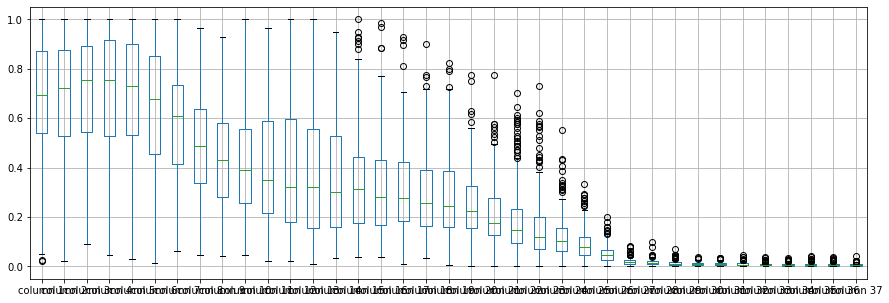

In [21]:
df.boxplot(return_type='axes', figsize=(15,5))

In [22]:

df.mean()

column 1     0.672622
column 2     0.676551
column 3     0.701395
column 4     0.702508
column 5     0.693127
column 6     0.640511
column 7     0.580840
column 8     0.502176
column 9     0.439040
column 10    0.417220
column 11    0.401225
column 12    0.394604
column 13    0.386904
column 14    0.363126
column 15    0.340997
column 16    0.321803
column 17    0.311143
column 18    0.288874
column 19    0.279327
column 20    0.246231
column 21    0.214939
column 22    0.197605
column 23    0.160278
column 24    0.122554
column 25    0.091424
column 26    0.052096
column 27    0.020490
column 28    0.016069
column 29    0.013420
column 30    0.010727
column 31    0.010970
column 32    0.009289
column 33    0.008224
column 34    0.007813
column 35    0.007929
column 36    0.007930
column 37    0.006515
dtype: float64

In [23]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37
column 1,1.000000,0.857338,0.589178,0.437365,0.205458,0.059162,-0.127974,-0.100148,-0.128496,-0.245039,...,-0.097320,-0.135570,-0.208135,-0.105665,-0.211614,-0.173781,-0.109001,-0.208437,-0.174698,-0.178783
column 2,0.857338,1.000000,0.844633,0.623373,0.350892,0.163445,-0.034170,-0.022723,-0.050225,-0.187616,...,-0.203298,-0.249379,-0.237953,-0.221227,-0.280784,-0.187228,-0.153080,-0.272810,-0.311328,-0.255743
column 3,0.589178,0.844633,1.000000,0.857124,0.527698,0.275929,0.081675,0.028858,-0.011356,-0.147206,...,-0.173388,-0.255015,-0.241276,-0.284497,-0.345417,-0.210940,-0.262369,-0.301652,-0.385688,-0.296326
column 4,0.437365,0.623373,0.857124,1.000000,0.792886,0.476682,0.220744,0.151378,0.059162,-0.149099,...,-0.138411,-0.191860,-0.259476,-0.280451,-0.352942,-0.274800,-0.264303,-0.323353,-0.362591,-0.270916
column 5,0.205458,0.350892,0.527698,0.792886,1.000000,0.818297,0.545376,0.384608,0.262145,0.061429,...,-0.026980,-0.068435,-0.152962,-0.218454,-0.262260,-0.203926,-0.191883,-0.256334,-0.270702,-0.192507
column 6,0.059162,0.163445,0.275929,0.476682,0.818297,1.000000,0.810755,0.558439,0.351988,0.256728,...,-0.012147,-0.069755,-0.138734,-0.238834,-0.249890,-0.226683,-0.235781,-0.278791,-0.256801,-0.217960
column 7,-0.127974,-0.034170,0.081675,0.220744,0.545376,0.810755,1.000000,0.788771,0.506202,0.436249,...,0.046163,0.040990,-0.029920,-0.170316,-0.132350,-0.051845,-0.081410,-0.132249,-0.130781,-0.086721
column 8,-0.100148,-0.022723,0.028858,0.151378,0.384608,0.558439,0.788771,1.000000,0.820978,0.571975,...,0.051340,0.079182,0.036290,-0.144538,-0.077357,-0.064845,-0.021444,-0.027006,-0.043943,-0.041405
column 9,-0.128496,-0.050225,-0.011356,0.059162,0.262145,0.351988,0.506202,0.820978,1.000000,0.786260,...,0.059594,0.090863,0.016553,-0.087964,-0.012789,0.024653,0.015992,0.016750,0.014363,-0.025629
column 10,-0.245039,-0.187616,-0.147206,-0.149099,0.061429,0.256728,0.436249,0.571975,0.786260,1.000000,...,-0.002591,0.003084,0.026045,-0.036571,0.002522,0.041750,0.048147,0.001580,0.053545,-0.017346


In [24]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [25]:
imputer = md.Midas(layer_structure = [37,37+46,37+46+46,37+46+46+46,37+46+46+46+46,37+46+46+46,37+46+46,37+46,37], vae_layer = False, seed = 460)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [37]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.356391319861778
Epoch: 1 , loss: 11.249475625845102
Epoch: 2 , loss: 11.183936852675219
Epoch: 3 , loss: 11.109846041752743
Epoch: 4 , loss: 11.088692591740536
Epoch: 5 , loss: 11.043933648329515
Epoch: 6 , loss: 10.98646648113544
Epoch: 7 , loss: 10.918743573702299
Epoch: 8 , loss: 10.82204033778264
Epoch: 9 , loss: 10.745847115149864
Epoch: 10 , loss: 10.659413557786207
Epoch: 11 , loss: 10.469703014080341
Epoch: 12 , loss: 10.19107591188871
Epoch: 13 , loss: 9.61306329873892
Epoch: 14 , loss: 8.61830759048462
Epoch: 15 , loss: 7.739128736349253
Epoch: 16 , loss: 7.414046617654654
Epoch: 17 , loss: 7.029668844663179
Epoch: 18 , loss: 6.752428641686072
Epoch: 19 , loss: 6.6497841981741095
Epoch: 20 , loss: 6.447349181542029
Epoch: 21 , loss: 6.434876405275785
Epoch: 22 , loss: 6.130921657268818
Epoch: 23 , loss: 6.051998395186204
Epoch: 24 , loss: 6.262060825641338
Epoch: 25 , loss: 5.7827778229346

In [26]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


ValueError: cannot join with no overlapping index names

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Sonar_C_1(imp).xlsx", index=False, header=False)